## Importing Necessary Libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating a Random Dataframe of Three Variables...

In [90]:
x1 = 0.6 * np.random.rand(100)
x2 = 1.5*x1 + (np.random.rand(100)/3)
x3 = (2.3*x1 + (np.random.rand(100)/5) + 0.05*x2)

training_data = pd.DataFrame(data={"X1": x1, "X2": x2 , "X3" : x3})
training_data.head()

,X1,X2,X3
0,0.589210,1.043178,1.475811
1,0.554453,1.145466,1.413275
2,0.062555,0.303682,0.275572
3,0.209908,0.589907,0.649263
4,0.247546,0.470441,0.728862


## 3D Scatter Plot of the Dataframe.

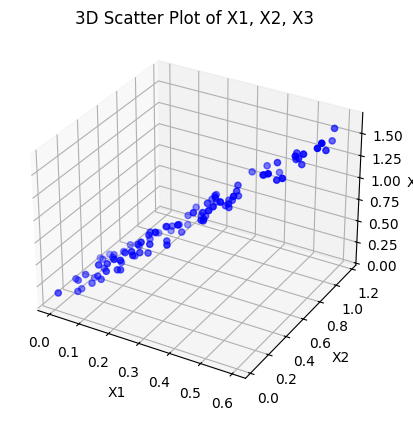

In [81]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(training_data['X1'], training_data['X2'], training_data['X3'], color='b', marker='o')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Show plot
plt.title("3D Scatter Plot of X1, X2, X3")
plt.show()

### To apply PCA on this Dataframe, We have to calculate its Covariance matrix(\Sigma) which is done by:


\[
\begin{aligned}
\Sigma &= \frac{1}{N_{\text{train}}} (\bar{X} \bar{X}^T) \\
N_{\text{train}} &= 100 \\
\bar{X} &= \text{mean-centered data}
\end{aligned}
\]


In [82]:
X_transpose = np.array(training_data)
X_bar_transpose = X_transpose - np.mean(X_transpose,axis=0)
X_bar = X_bar_transpose.T
N_train = training_data.shape[0]

In [83]:
sigma = (1/N_train) * np.matmul(X_bar,X_bar_transpose)

In [84]:
sigma

array([[0.02491705, 0.03824768, 0.06028694],
       [0.03824768, 0.06830252, 0.09281911],
       [0.06028694, 0.09281911, 0.14985995]])

### Now we want to Project our $\bar{X}^T$ data of Shape $(N_{\text{train}} , p)$ where $p$ is the number of input variables in the Dataframe (i.e $p = 3$) into a vector space (having orthogonal basis vectors $\vec{q_1},\vec{q_2},\vec{q_3} .. \vec{q_p}$) that the cov matrix of the projected data will be the Matrix $D$

### Let $Q$ (of shape  $p \times p$) be the matrix that contains the all the orthogonal basis vectors so the projected data will be given by $Q \bar{X}$ and $D$ is defined by:

\[
\begin{aligned}
D = \frac{1}{N_{\text{train}}} (Q \bar{X}) (Q \bar{X})^T \\
\end{aligned}
\]

By reducing:
\[
\begin{aligned}
\Sigma = Q^T \Lambda  Q \\
\end{aligned}
\]
where $\lambda$ is $D$

In [85]:
factorized_sigma = np.linalg.svd(sigma) 


In [86]:
Q_transpose = factorized_sigma[0]
Q = Q_transpose.T
Z = np.matmul(Q,X_bar)


In [87]:
New_data = pd.DataFrame(data = Z.T,columns=["Z1","Z2","Z3"])
New_data

,Z1,Z2,Z3
0,-0.248738,-0.003186,-0.025235
1,0.170491,0.020225,0.035508
2,-0.367942,0.014160,0.004552
3,-0.901117,-0.010205,-0.033308
4,-0.013359,0.159528,0.008439
...,...,...,...
95,0.490954,0.092271,0.011964
96,-0.567003,0.033418,-0.037464
97,-0.844145,0.097493,0.002980
98,-0.365230,0.138469,-0.003925


In [88]:
eigen_values = factorized_sigma[1]
total = np.sum(eigen_values)

var_sum = 0
pvp = 0.9

for i in range(eigen_values.shape[0]):
    if (var_sum/total) > pvp:
        break
    var_sum += eigen_values[i]
    val = i

projected_final = New_data.iloc[:,0:(val-1)]
projected_final


,Z1,Z2
0,-0.248738,-0.003186
1,0.170491,0.020225
2,-0.367942,0.014160
3,-0.901117,-0.010205
4,-0.013359,0.159528
...,...,...
95,0.490954,0.092271
96,-0.567003,0.033418
97,-0.844145,0.097493
98,-0.365230,0.138469


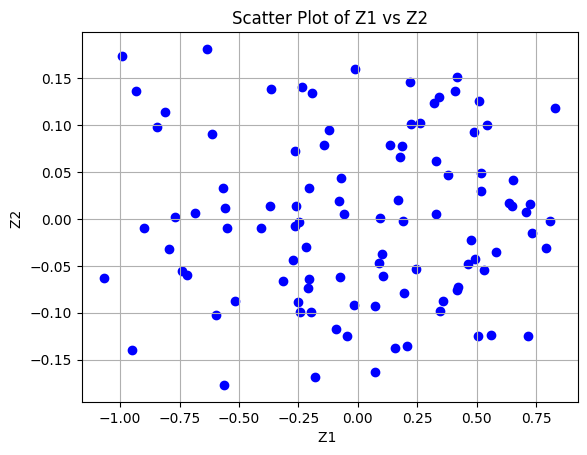

In [92]:
# Scatter plot for new Data
plt.scatter(projected_final['Z1'], projected_final['Z2'], color='blue', marker='o')

# Add labels and title
plt.xlabel("Z1 ")
plt.ylabel("Z2 ")
plt.title("Scatter Plot of Z1 vs Z2")

# Show the plot
plt.grid(True)
plt.show()